# 1. Unsupervised Learning

## 1.1. KMeans Clustering

This notebook provides walks through some basics of KMeans clustering which can help us to find patterns in our unlabeled data.
Here we are using the old school iris dataset to clasify and make clusters of three kinds of flowers.

In [10]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

In [3]:
# Load the dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
# print the head of data
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### How do you find the optimum number of clusters for K Means? How does one determine the value of K?

#### Some Important Parameters

##### n_initint, default=10
Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

##### max_iterint, default=300
Maximum number of iterations of the k-means algorithm for a single run.

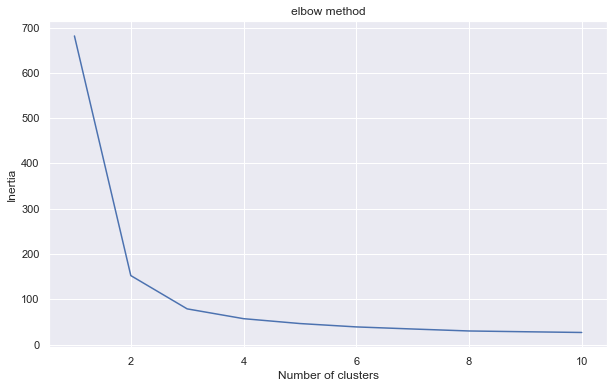

In [11]:
# Finding the optimum number of clusters for k-means classification

X = iris_df.iloc[:, [0,1,2,3]].values

from sklearn.cluster import KMeans
inertia = [] # Within cluster sum of squares

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init=10, random_state=1)
    
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
    
# Plottig the results on a line graph
sns.set()
plt.figure(figsize=(10,6))
plt.plot(range(1,11), inertia)
plt.title("elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

The above method of finding optimum number of k's or number of cluster in a dataset is known as the "elbow method". y-axis represents the within clusters sum of squares. (WCSS). It decreases as the number of cluster increases but we chose the the one where the line stops moving at a fast rate and becomes like elbow.

##### From the above graph we chose 3 as the optimum number of clusters.

In [12]:
# Apply Kmeans to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
               max_iter = 300, n_init = 10, random_state = 0)

kmeans_pred = kmeans.fit_predict(X)

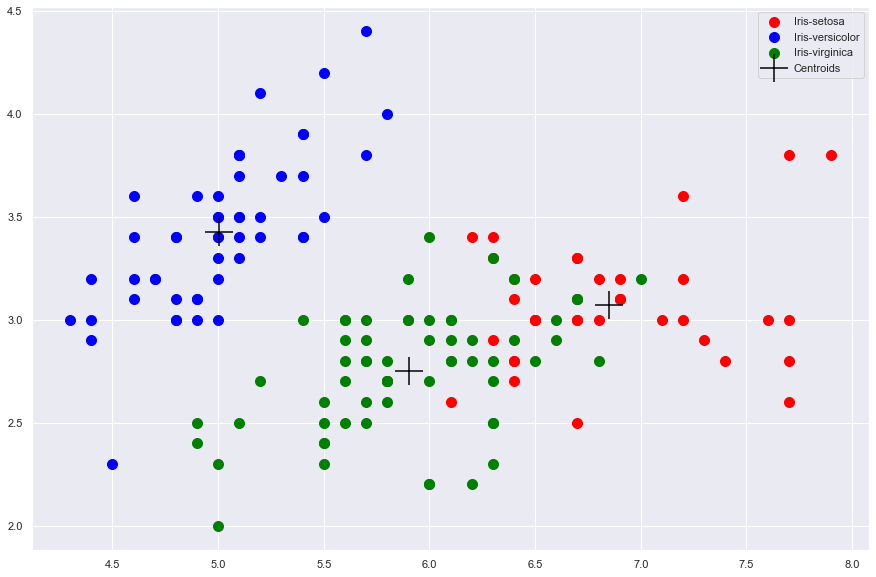

In [27]:
# Visualize the clusters 
plt.figure(figsize = (15, 10))
plt.scatter(X[kmeans_pred == 0, 0], X[kmeans_pred == 0, 1],
           s = 100, c="red", label = 'Iris-setosa')

plt.scatter(X[kmeans_pred == 1, 0], X[kmeans_pred == 1, 1],
           s = 100, c="blue", label = 'Iris-versicolor')

plt.scatter(X[kmeans_pred == 2, 0], X[kmeans_pred == 2, 1],
           s = 100, c="green", label = 'Iris-virginica')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           marker="+", s  = 800, c = 'black', label = 'Centroids')
plt.legend()
plt.show()

##### From the above graph, we can observe that KMeans is a very nice approach to find patterns in our data and classify or segment out datapoints to better understand the hidden meaning underneath them.
